En este archivo se observan los puntos 4 y 5 de la actividad A3.2

4. Evalúa el desempeño del modelo en dichas imágenes. Compara los resultados con los previos y comenta motivos de potencial error

En la sección 1 de este bloque de código, se cargó el primer modelo creado en los puntos 1 y 2, sin las mejoras. Luego en la sección 2 se definió la ruta de la carpeta donde se encuentra las 50 imágenes.

En la sección 3 se crea la función que procesará las imagenes antes de hacerles una predicción. En esta función se utilizan los conceptos vistos en clase, como el thresholding, binarizing, rescaling y normalization. Esto permite que el modelo haga las predicciones adecuadas.

En la sección 4 se aplica la función de procesamiento a cada imagen de la carpeta.

Después en la sección 5 se realizan las predicciones, y en la sección 6 se hacen display a las imágenes procesadas, así como su clasificación predicha

En las secciones 7 y 8 se imprimen las predicciones que hizo el modelo, y el *accuracy* obtenido por el modelo en la predicción de las 50 imágenes así como las predicciones incorrectas.

Modelo cargado correctamente.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


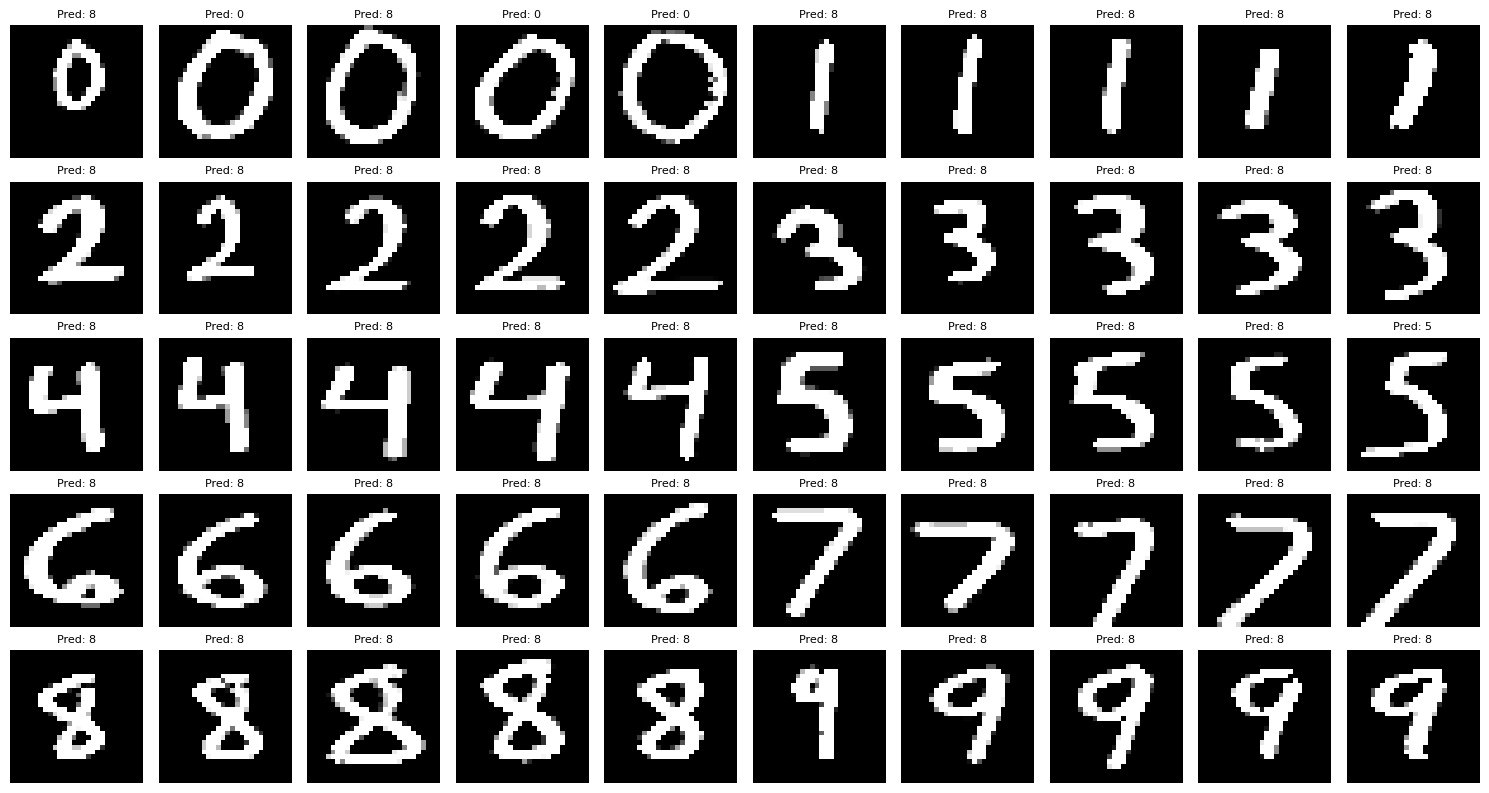

0_1.jpg: 8
0_2.jpg: 0
0_3.jpg: 8
0_4.jpg: 0
0_5.jpg: 0
1_1.jpg: 8
1_2.jpg: 8
1_3.jpg: 8
1_4.jpg: 8
1_5.jpg: 8
2_1.jpg: 8
2_2.jpg: 8
2_3.jpg: 8
2_4.jpg: 8
2_5.jpg: 8
3_1.jpg: 8
3_2.jpg: 8
3_3.jpg: 8
3_4.jpg: 8
3_5.jpg: 8
4_1.jpg: 8
4_2.jpg: 8
4_3.jpg: 8
4_4.jpg: 8
4_5.jpg: 8
5_1.jpg: 8
5_2.jpg: 8
5_3.jpg: 8
5_4.jpg: 8
5_5.jpg: 5
6_1.jpg: 8
6_2.jpg: 8
6_3.jpg: 8
6_4.jpg: 8
6_5.jpg: 8
7_1.jpg: 8
7_2.jpg: 8
7_3.jpg: 8
7_4.jpg: 8
7_5.jpg: 8
8_1.jpg: 8
8_2.jpg: 8
8_3.jpg: 8
8_4.jpg: 8
8_5.jpg: 8
9_1.jpg: 8
9_2.jpg: 8
9_3.jpg: 8
9_4.jpg: 8
9_5.jpg: 8

Exactitud del modelo en las 50 imágenes: 18.00%
INCORRECTO → 0_1.jpg: predicho=8, real=0
INCORRECTO → 0_3.jpg: predicho=8, real=0
INCORRECTO → 1_1.jpg: predicho=8, real=1
INCORRECTO → 1_2.jpg: predicho=8, real=1
INCORRECTO → 1_3.jpg: predicho=8, real=1
INCORRECTO → 1_4.jpg: predicho=8, real=1
INCORRECTO → 1_5.jpg: predicho=8, real=1
INCORRECTO → 2_1.jpg: predicho=8, real=2
INCORRECTO → 2_2.jpg: predicho=8, real=2
INCORRECTO → 2_3.jpg: predicho=8

In [2]:
# ============================================
# Evaluación de 50 imágenes 
# ============================================

%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.keras.models import load_model

# 1. Cargar modelo entrenado (.keras)
model_path = 'model_1.keras'
model = load_model(model_path)
print("Modelo cargado correctamente.")

# 2. Ruta con las imágenes
img_dir = r"C:\Users\bhjf2\Documents\IMT-IRSI\Quinto Semestre\Inteligencia Artificial\Tareas\Redes Neuronales\Numeros"
img_height, img_width = 28, 28

# 3. Preprocesamiento de imágenes
def preprocess_image(path):
    # Cargar imagen en escala de grises
    img = cv.imread(path, cv.IMREAD_GRAYSCALE)
    # Aplicar threshold inverso
    thresh = cv.threshold(img, 90, 255, cv.THRESH_BINARY_INV)[1]
    # Redimensionar a 28x28
    resized = cv.resize(thresh, (img_height, img_width))
    # Normalizar a rango [0,1]
    normalized = resized.astype("float32") / 255.0
    return normalized, resized

# 4. Cargar y procesar todas las imágenes
imagenes = []
imagenes_viz = []
file_names = []

for fname in sorted(os.listdir(img_dir)):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        path = os.path.join(img_dir, fname)
        img_proc, img_resized = preprocess_image(path)
        imagenes.append(img_proc)
        imagenes_viz.append(img_resized)
        file_names.append(fname)

# Convertir lista a arreglo numpy
imagenes = np.array(imagenes)

# 5. Realizar predicciones
predicciones = model.predict(imagenes)
pred_labels = np.argmax(predicciones, axis=1)

# 6. Mostrar resultados
plt.figure(figsize=(15, 8))
for i in range(len(imagenes_viz)):
    plt.subplot(5, 10, i + 1)
    plt.imshow(imagenes_viz[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_labels[i]}", fontsize=8)
plt.tight_layout()
plt.show()

# 7. Mostrar predicciones en consola
for name, pred in zip(file_names, pred_labels):
    print(f"{name}: {pred}")

# 8. Calcular accuracy si conoces las etiquetas reales
true_labels = np.array(
    [0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 + [7]*5 + [8]*5 + [9]*5
)

# Calcular exactitud (solo si coincide el orden)
if len(true_labels) == len(pred_labels):
    accuracy = np.mean(pred_labels == true_labels)
    print(f"\nExactitud del modelo en las 50 imágenes: {accuracy*100:.2f}%")

    # Mostrar predicciones incorrectas
    for name, pred, true in zip(file_names, pred_labels, true_labels):
        if pred != true:
            print(f"INCORRECTO → {name}: predicho={pred}, real={true}")
else:
    print("\nLas etiquetas reales no coinciden en cantidad con las imágenes.")


Observando los resultados, vemos que el primer modelo tuvo un desempeño bastante pobre, teniendo un *accuracy* de 18%, contrario al 96% que se obtuvo con el grupo de prueba de MNIST. Esto probablemente se debe a que las imágenes de entrenamiento y prueba de MNIST están bastante bien centradas, escaladas, etc. 

En cambio las imágenes generadas a mano, tienen algunas imperfecciones, y por lo tanto el es probable que el modelo no se desempeñe de buena manera.

En la siguiente sección, se utilizará el modelo con las mejoras, y observar si su desempeño mejora (los cambios realizados en el modelo se explican en la documentación del modelo). Se utilizó el mismo procedimiento que el anterior, omitiendo los pasos 2-4 que tienen que ver con el procesamiento de imágenes, pues son las mismas. 

Modelo cargado correctamente.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


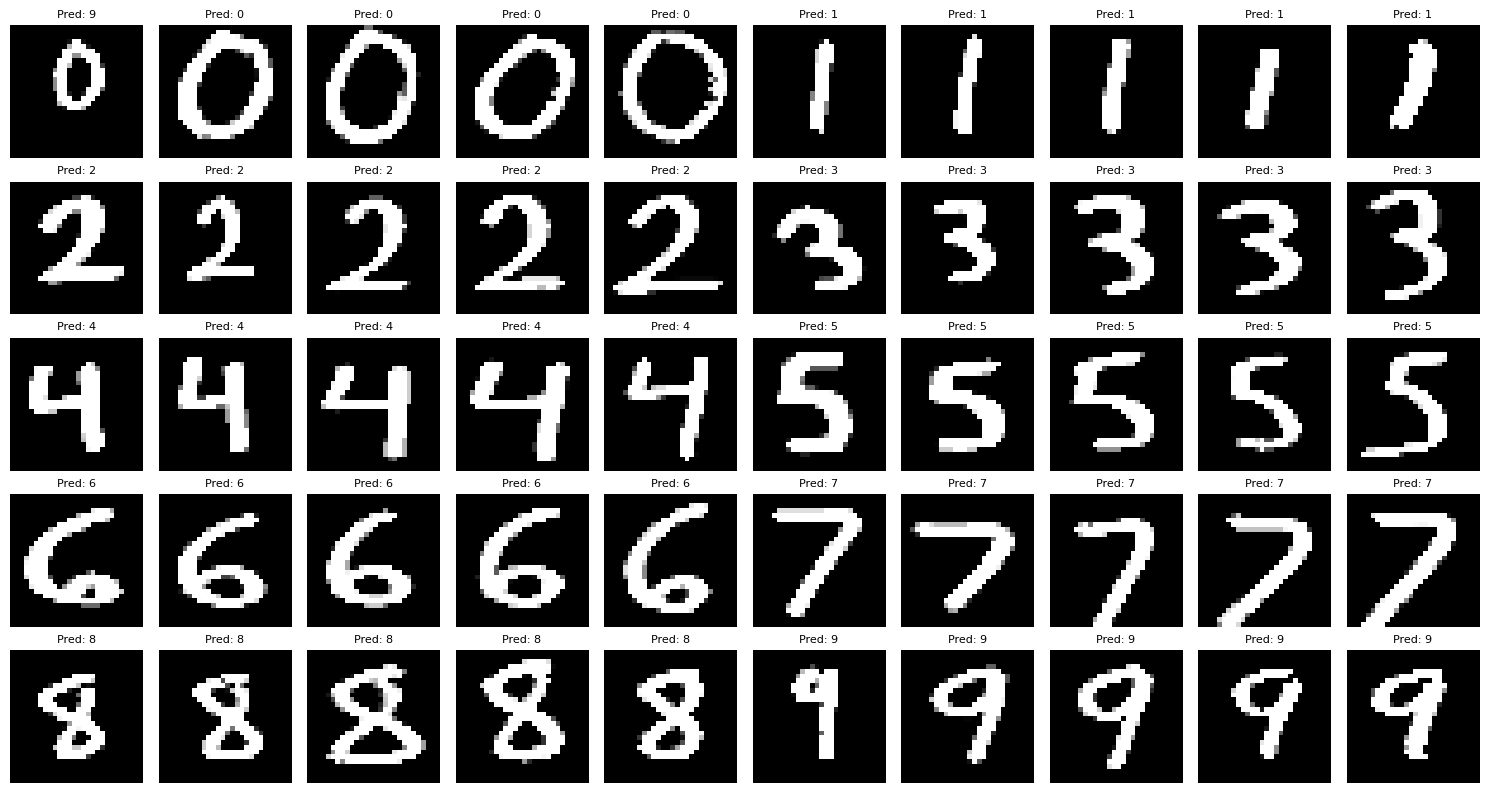

0_1.jpg: 9
0_2.jpg: 0
0_3.jpg: 0
0_4.jpg: 0
0_5.jpg: 0
1_1.jpg: 1
1_2.jpg: 1
1_3.jpg: 1
1_4.jpg: 1
1_5.jpg: 1
2_1.jpg: 2
2_2.jpg: 2
2_3.jpg: 2
2_4.jpg: 2
2_5.jpg: 2
3_1.jpg: 3
3_2.jpg: 3
3_3.jpg: 3
3_4.jpg: 3
3_5.jpg: 3
4_1.jpg: 4
4_2.jpg: 4
4_3.jpg: 4
4_4.jpg: 4
4_5.jpg: 4
5_1.jpg: 5
5_2.jpg: 5
5_3.jpg: 5
5_4.jpg: 5
5_5.jpg: 5
6_1.jpg: 6
6_2.jpg: 6
6_3.jpg: 6
6_4.jpg: 6
6_5.jpg: 6
7_1.jpg: 7
7_2.jpg: 7
7_3.jpg: 7
7_4.jpg: 7
7_5.jpg: 7
8_1.jpg: 8
8_2.jpg: 8
8_3.jpg: 8
8_4.jpg: 8
8_5.jpg: 8
9_1.jpg: 9
9_2.jpg: 9
9_3.jpg: 9
9_4.jpg: 9
9_5.jpg: 9

Exactitud del modelo en las 50 imágenes: 98.00%
INCORRECTO → 0_1.jpg: predicho=9, real=0


In [3]:
# 1. Cargar modelo entrenado (.keras)
model_path = 'model_2.keras'
model = load_model(model_path)
print("Modelo cargado correctamente.")


# 5. Realizar predicciones
predicciones = model.predict(imagenes)
pred_labels = np.argmax(predicciones, axis=1)

# 6. Mostrar resultados
plt.figure(figsize=(15, 8))
for i in range(len(imagenes_viz)):
    plt.subplot(5, 10, i + 1)
    plt.imshow(imagenes_viz[i], cmap='gray')
    plt.axis('off')
    plt.title(f"Pred: {pred_labels[i]}", fontsize=8)
plt.tight_layout()
plt.show()

# 7. Mostrar predicciones en consola
for name, pred in zip(file_names, pred_labels):
    print(f"{name}: {pred}")

# 8. Calcular accuracy
true_labels = np.array(
    [0]*5 + [1]*5 + [2]*5 + [3]*5 + [4]*5 + [5]*5 + [6]*5 + [7]*5 + [8]*5 + [9]*5
)

# Calcular exactitud (solo si coincide el orden)
if len(true_labels) == len(pred_labels):
    accuracy = np.mean(pred_labels == true_labels)
    print(f"\nExactitud del modelo en las 50 imágenes: {accuracy*100:.2f}%")

    # Mostrar predicciones incorrectas
    for name, pred, true in zip(file_names, pred_labels, true_labels):
        if pred != true:
            print(f"INCORRECTO → {name}: predicho={pred}, real={true}")
else:
    print("\nLas etiquetas reales no coinciden en cantidad con las imágenes.")

En esta sección, se importó *model_2.keras*, que es el modelo al que se le implementaron las mejoras. Y podemos ver una mejora astronómica. El *accuracy* de este modelo fue de 98%, lo cual es altamente superior al 18% del primer modelo. Esto nos indica que los procesos de *Data Augmentation*, *Dropout Regularization*, y Normalización de las imágenes impactaron apliamente en el desempeño, logrando que el modelo tenga una mejor generalización. 